<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../../Index.ipynb" target="_blank"><< Index</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=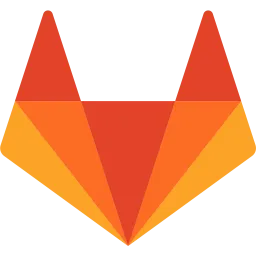" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2ocean-case-studies/HEAD?urlpath=%2Ftree%2FCase_studies%2FWater_quality%2FAlgal_blooms%2FAlgal_blooms_baltic_2023.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>

</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to download data from the EUMETSAT Data Store
- **<a href="https://data.marine.copernicus.eu/register" target="_blank">A Copernicus Marine Service (CMEMS) account</a>** to download data from the CMEMS Data Store
    
There are no prerequisite notebooks for this module, but you may wish to look at the following notebooks on using Sentinel-3 OLCI data; <br>
- **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-OLCI" target="_blank">Learn SRAL (EUMETSAT Gitlab)</a>**

</div>
<hr>

# Investigating cyanobacterial algal blooms in the Baltic Sea

### Data used

| Dataset | EUMETSAT Data Store<br>collection ID | EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description | Copernicus Marine<br>Data Store product ID | Copernicus Marine<br>product description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| Sentinel-3 OLCI level-1b full resolution | EO:EUM:DAT:0409 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_1_EFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_1_EFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_1_EFR___" target="_blank">Description</a> | - | - |
| Sentinel-3 OLCI level-2 full resolution | EO:EUM:DAT:0407 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_2_WFR___" target="_blank">Description</a> | - | - |
| Baltic Sea Multiyear Ocean Colour Plankton, Reflectances and Transparency L3 daily observations | - | - | OCEANCOLOUR_BAL_BGC_L3_MY_009_133 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3AOCEANCOLOUR_BAL_BGC_L3_MY_009_133" target="_blank">Description</a> | OCEANCOLOUR_BAL_BGC_L3_MY_009_133 | <a href="https://data.marine.copernicus.eu/product/OCEANCOLOUR_BAL_BGC_L3_MY_009_133/description" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know how to ;

* access Sentinel-3 OLCI data, and regional ocean colour products from the Copernicus Marine Service
* create a true colour image from Sentinel-3 OLCI data
* visualise and appropriately flag derived chlorophyll-a data from these products
* compare and understand differences between data derived with different chlorophyll-a algorithms
* plot time series of ocean colour data to contextualise bloom events
* understand the limitations of using chlorophyll-a concentrations for detecting cyanobacteria blooms
* assess the latest research on algorithm development and bloom quantification for the Baltic Sea.


### Outline
Whilst production by algae is an essential component of marine foodwebs and biogeochemical cycling, extreme blooms [[1]](#ref1) can also pose risks to environmental and human health.

Eutrophication, excessive algal growth, as a result of excess nutrients from anthropogenic activities, is a long standing issue in the Baltic sea. Cyanobacteria play a central role in this issue. Whilst cyanobacteria blooms can occur naturally, particularly in warm weather, they can be exacerbated by nutrient inputs. They also play a feedback role in the nutrient loading due to their nitrogen fixing capabilities, and present additional hazards when they bloom. 

Blooms can affect fish stocks, aquaculture, bathing water quality and tourism, as well as causing rashes, respiratory, and gastrointestinal issues for those exposed. 

Satellite ocean colour can provide operational views of water quality, with the Sentinel-3 mission particularly well suited to observing eutrophication and algal blooms such as those occurring in the Baltic Sea. However retreiving accurate geophysical information in these situations is not trivial, and products such a chlorophyll-a derived from a variety of algorithms, can be more/less suitable. 

This notebook shows how to access regional ocean colour data, visualise both imagery and derived products, and place events in the context of a longer time series.

<figure>
  <img src="https://www.researchgate.net/publication/315534680/figure/fig2/AS:614155694395429@1523437536804/Surface-accumulations-of-cyanobacteria-in-the-southern-Baltic-Sea-in-2013-Photo-credit.png" width='40%'/>
  <img src="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/raw/main/img/Cyanobacteria_bloom.png" width='51.25%'/>
  <figcaption><a id='figure1'>Figure 1: Cyanobacteria can form bright green blooms that float on the surface (left), making them readily visible in optical measurements taken by satellites such as Sentinel-3A and B and their Ocean and Land Colour Instruments (OLCI) (right) (Credit: (left) <a href="https://tos.org/oceanography/article/globalhab-a-new-program-to-promote-international-research-observations-and" target="blank">Berdalet et al. (2017)</a>, CC-BY-4.0, (right) EUMETSAT). </figcaption>
</figure>

#### References

1. <a id='ref1'><a href="https://aslopubs.onlinelibrary.wiley.com/doi/10.4319/lo.1997.42.5_part_2.1132" target="blank">Smayda, T. J. (1997). What is a bloom? A commentary. Limnology and Oceanography, 42(5part2), 1132-1136.</a>
2. <a id='ref2'><a href="https://www.sciencedirect.com/science/article/abs/pii/S0034425712002350" target="blank">Matthews, M. W., Bernard, S., & Robertson, L. (2012). An algorithm for detecting trophic status (chlorophyll-a), cyanobacterial-dominance, surface scums and floating vegetation in inland and coastal waters. Remote Sensing of Environment, 124, 637-652.</a>
3. <a id='ref3'><a href="https://www.mdpi.com/2072-4292/13/16/3071" target="_blank">Brando, V. E., Sammartino, M., Colella, S., Bracaglia, M., Di Cicco, A., D’Alimonte, D., ... & Attila, J. (2021). Phytoplankton bloom dynamics in the baltic sea using a consistently reprocessed time series of multi-sensor reflectance and novel chlorophyll-a retrievals. Remote Sensing, 13(16), 3071.</a>

<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>

 1. [Step 1: Setting up our analysis](#section1)
 1. [Step 2: Downloading level-1 and level-2 ocean colour products from the EUMETSAT Data Store](#section2)
 1. [Step 3: Plotting level-1 RGB images](#section3)
 1. [Step 4: Comparing standard level-2 chlorophyll estimates](#section4)
 1. [Step 5: The Maximum Peak Height (MPH) chlorophyll algorithm](#section5)
 1. [Step 6: Exploring level-3 ocean colour products from the Copernicus Marine Service](#section6)
 1. [Step 7: Downloading and analysing level-3 ocean colour products](#section7)
 1. [Step 8: Conclusions](#section8)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting up our analysis
[Back to top](#TOCTOP)

</div>

In this section we will set up all the parameters we need to run our notebook.

We will begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../../README.md" target="_blank">README</a>**.

If you are running on WEkEO, you should ensure that you have selected the "**miniwekeolab**" environment/ipkernel using the menu option on the top right of the panel. 

In [1]:
import os                              # a library that allows us access to basic operating system commands
import glob                            # a library that helps us search for files
import eumartools                      # a EUMETSAT library that support working with Sentinel-3 products
import eumdac                          # a tool that helps us download via the eumetsat/data-store
import datetime                        # a library that allows us to work with dates and times
import shutil                          # a library that allows us access to basic operating system commands like copy
import xarray as xr                    # a library that helps us work efficiently with multi-dimensional arrays
import matplotlib                      # a library the provides plotting capability
import matplotlib.pyplot as plt        # a library the provides plotting capability
import cartopy                         # a library that supports mapping and projection
import cartopy.crs as ccrs             # a library that supports mapping and projection
import numpy as np                     # a library that lets us work with arrays; we import this with a new name "np"
from pathlib import Path               # a library that helps construct system path objects
import getpass                         # a library to help us enter passwords
import warnings                        # a library that supports managing warning messages
import copernicusmarine                # a library to help us access CMEMS data
from xcube.webapi.viewer import Viewer # a library that provides the Xcube viewer

warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size': 12})

# set Xcube server if running on WEkEO
if "WEKEO_DATABROKER_URL" in os.environ:
    os.environ["XCUBE_JUPYTER_LAB_URL"] = f"https://jupyterhub.prod.wekeo2.eu/user/{os.environ['JUPYTERHUB_USER']}/"

In this section of the notebook we will select and acquire some Sentinel-3 OLCI data that is relevant to our region of interest (ROI) in the Baltic Sea. Lets begin by defining the bounds of this region, converting them into a well known text (WKT) format polygon that describes the list of the corners of a box.

Along with this, we will also define our time range of interest (we'll be looking only over a day where we know a bloom occurred).

In [2]:
#L1/L2
download_l1_l2_data = True

# defining our bounding box (W, E, S, N)
ROI_L2 = [17, 20.0, 55.0, 60.0]
roi_L2 = [[ROI_L2[0], ROI_L2[2]], [ROI_L2[1], ROI_L2[2]], [ROI_L2[1], ROI_L2[3]], [ROI_L2[0], ROI_L2[3]], [ROI_L2[0], ROI_L2[2]]]

# defining our L2 search times
start_L2 = datetime.datetime(2022, 7, 3, 9, 0)
end_L2 = datetime.datetime(2022, 7, 3, 10, 00)

# collections
collectionIDs = ['EO:EUM:DAT:0409', 'EO:EUM:DAT:0407']

# components
all_components = [["Oa02_radiance.nc", "Oa06_radiance.nc", "Oa09_radiance.nc", "geo_coordinates.nc"],
                  ["Oa06_reflectance.nc","Oa08_reflectance.nc", "Oa10_reflectance.nc", "Oa11_reflectance.nc", "Oa12_reflectance.nc", "Oa18_reflectance.nc", "chl_nn.nc", "chl_oc4me.nc", "geo_coordinates.nc", "wqsf.nc"]]

# wavelengths
lambdas = [665, 681, 709, 753, 885]

Next, we'll similarly define a region and time frame of interest to extract a longer time series of ocean colour data from the Copernicus Marine Service.

In [3]:
# L3
download_l3_data = True

# defining our bounding box (W, E, S, N)
ROI_L3 = [18.0, 21.5, 57.5, 59.5]
roi_L3 = [[ROI_L3[0], ROI_L3[2]], [ROI_L3[1], ROI_L3[2]], [ROI_L3[1], ROI_L3[3]], [ROI_L3[0], ROI_L3[3]], [ROI_L3[0], ROI_L3[2]]]

# defining our L3 search times
start_oper_L3 = datetime.datetime(2022, 6, 27, 0, 0)
end_oper_L3 = datetime.datetime(2022, 7, 7, 23, 59)

start_clim_L3 = datetime.datetime(2017, 1, 1, 0, 0)
end_clim_L3 = datetime.datetime(2024, 12, 31, 23, 59)

# collections
CMEMS_product = "cmems_obs-oc_bal_bgc-plankton_my_l3-multi-1km_P1D"

# variables
CMEMS_variables = ['CHL']

Next we will define directory to download our products into. By default we will set this to a directory called "products" that is in the same folder as this notebook.

In [4]:
# Create a download directory for our products
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

<div class="alert alert-warning" role="alert">

## <a id='section99'></a>Defining functions
[Back to top](#TOCTOP)

</div>

#### Defining a quick function to supporting plotting

Before we move on to our analysis, we are going to define a quick function for use later on. We define functions when we have some code that we want to use repeatedly later on. In this section we define a quick functions that we will use to aid plotting. You don't need to worry about how this function works, and so it is hidden by default. You can click on the "+1 cell hidden" box below if you want to see it.

In [5]:
def embellish_plot(m):
    """Quick function to embellish plots with gridlines and labels

    Args:
        m (axis): the axis to plot into
    Returns:
        None
    """
    # Embellish with gridlines
    m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=500)
    g1 = m.gridlines(draw_labels = True, linestyle='--', linewidth=0.5, zorder=1000)
    g1.top_labels = g1.right_labels = False
    g1.xlabel_style = g1.ylabel_style = {'color': '0.5'}

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Downloading level-1 and level-2 ocean colour products from the EUMETSAT Data Store
[Back to top](#TOCTOP)

</div>

<div class="alert alert-block alert-success">

### Accessing the EUMETSAT Data Store

To access Copernicus marine data from the <a href="https://data.eumetsat.int " target="_blank">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`) python package. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

You can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac " target="_blank">EUMETSAT GitLab</a>. Please visit the EUMETSAT user portal for more information on the <a href="https://user.eumetsat.int/data-access/data-store " target="_blank">EUMETSAT Data Store</a> and <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide " target="_blank">eumdac</a>.

To download data from the EUMETSDAT Data Store via API, you need to provide credentials. To obtain these you should first register at for an <a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a>. Once you have an account, you can retrieve your `<your_consumer_key>` and `<your_consumer_secret>` from the <a href="https://api.eumetsat.int/api-key/ " target="_blank">"EUMETSAT Data Store API"</a> page (*Note: you must click the "Show hidden fields" button at the bottom of the page to see the relevant fields*). If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: your key and secret are permanent, so you should take care to never share them*

</div>

In [6]:
# load credentials
eumdac_credentials_file = Path(Path.home() / '.eumdac' / 'credentials')

if os.path.exists(eumdac_credentials_file):
    consumer_key, consumer_secret = Path(eumdac_credentials_file).read_text().split(',')
else:
    # creating authentication file
    consumer_key = input('Enter your consumer key: ')
    consumer_secret = getpass.getpass('Enter your consumer secret: ')
    try:
        os.makedirs(os.path.dirname(eumdac_credentials_file), exist_ok=True)
        with open(eumdac_credentials_file, "w") as f:
            f.write(f'{consumer_key},{consumer_secret}')
    except:
        pass
        
token = eumdac.AccessToken((consumer_key, consumer_secret))
print(f"This token '{token}' expires {token.expiration}")

This token 'b73279a5-9c9b-3b94-9a3c-279c3be68d66' expires 2024-05-30 17:47:51.049056


Now we have a token, we can create an instance of the EUMETSAT Data Store.

In [7]:
datastore = eumdac.DataStore(token)

Data in the Data Store are stored as collections, each with its own ID. If we don't know our collection ID *a priori*, we can find this information via the **<a href="https://data.eumetsat.int/">Data Store GUI</a>** or by asking `eumdac` to tell us about all available SRAL and Poseidon-4 collections as follows:

In [8]:
# list all OLCI collection IDs - if we don't know a priori which collection we are interested in. 
for collection_id in datastore.collections:
    if ("OLCI" in collection_id.title):
        if "non-public" in collection_id.abstract: continue
        print(f"Collection ID({collection_id}): {collection_id.title}")

Collection ID(EO:EUM:DAT:0410): OLCI Level 1B Reduced Resolution - Sentinel-3
Collection ID(EO:EUM:DAT:0556): OLCI Level 2 Ocean Colour Full Resolution (version BC003) - Sentinel-3 - Reprocessed
Collection ID(EO:EUM:DAT:0557): OLCI Level 2 Ocean Colour Reduced Resolution (version BC003) - Sentinel-3 - Reprocessed
Collection ID(EO:EUM:DAT:0407): OLCI Level 2 Ocean Colour Full Resolution - Sentinel-3
Collection ID(EO:EUM:DAT:0408): OLCI Level 2 Ocean Colour Reduced Resolution - Sentinel-3
Collection ID(EO:EUM:DAT:0409): OLCI Level 1B Full Resolution - Sentinel-3
Collection ID(EO:EUM:DAT:0577): OLCI Level 1B Full Resolution (version BC002) - Sentinel-3 - Reprocessed
Collection ID(EO:EUM:DAT:0578): OLCI Level 1B Reduced Resolution (version BC002) - Sentinel-3 - Reprocessed


In [9]:
selected_collections = []
for collectionID in collectionIDs:
    selected_collections.append(datastore.get_collection(collectionID))

Now we have our collection of interest, we can refine our search to obtain **only** the products that match our criteria. Lets apply our search and list our results.

In [10]:
all_products = []
polygon = 'POLYGON(({}))'.format(','.join(["{} {}".format(*coord) for coord in roi_L2]))
for selected_collection in selected_collections:
    products = selected_collection.search(geo=polygon, dtstart=start_L2, dtend=end_L2)
    all_products.append(products)
    for product in products:
        print(product)

S3B_OL_1_EFR____20220703T093100_20220703T093400_20220704T142637_0179_067_364_1980_MAR_O_NT_002.SEN3
S3B_OL_2_WFR____20220703T093100_20220703T093400_20220704T221726_0179_067_364_1980_MAR_O_NT_003.SEN3


Let's now loop through our products and download the specified components (if `download_l1_l2_data=True`, above), or gather them from our download directory (if `download_l1_l2_data=False`, above). If you are downloading for the first time, you should find that, after running this cell your download directory has all of the listed products within it.

In [11]:
if download_l1_l2_data:
    downloaded_components = []
    
    for collection, products, components in zip(collectionIDs, all_products, all_components):
    
        for product, count in zip(products, range(len(products))):
        
            product_download_directory = os.path.join(download_dir, str(product))
            os.makedirs(product_download_directory, exist_ok=True)
        
            # download the required product components
            for entry in product.entries:
                res = [ele for ele in components if(ele == os.path.basename(entry))]
                if res:
                    with product.open(entry=entry) as fsrc, open(os.path.join(product_download_directory, fsrc.name),
                                                                mode='wb') as fdst:
                        downloaded_components.append(os.path.join(product_download_directory, fsrc.name))
                        print(f'Downloading ({count+1}/{len(products)}) {product}: {fsrc.name}.')
                        shutil.copyfileobj(fsrc, fdst)
else:
    downloaded_components = sorted(glob.glob(os.path.join(download_dir, "*", "*.nc")))

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Plotting level-1 RGB images
[Back to top](#TOCTOP)

</div>

Now that we've retrieved some data, let's take a look at it to see what is visible in the data, in an approximate way to how our eyes would see it if we were in space with the satellite.

First we'll identify our level-1 files, and open them as an xarray Dataset.

In [12]:
# select level-1 files
l1_files = glob.glob(os.path.join(download_dir, '*EFR*', "*.nc"))
ds_l1 = xr.open_mfdataset(l1_files)

We can take a quick look at what's in the files by querying the xarray object. We're going to use the level-1 data (top of atmosphere, uncorrected for atmospheric effects) so let's start with that...

In [13]:
ds_l1

<xarray.Dataset> Size: 637MB
Dimensions:        (rows: 4091, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    Oa02_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa06_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa09_radiance  (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    altitude       (rows, columns) float32 80MB dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    latitude       (rows, columns) float64 159MB dask.array<chunksize=(819, 973), meta=np.ndarray>
    longitude      (rows, columns) float64 159MB dask.array<chunksize=(819, 973), meta=np.ndarray>
Attributes: (12/17)
    absolute_orbit_number:  21811
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2022-07-04T14:26:37Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.12
    start_time:             2022-07-03T09:30:59.937359Z
    stop_time:              2022-07-03T09:33:59.905084Z
    title:                  OLCI Level 1b Product, Radiance Oa02 Data Set

In the next step, we'll set up a couple of image subsets to make plotting a bit quicker and to provide focus on our area of interest. 

In [14]:
# subset image
ex_l2, ey_l2, mask_l2 = eumartools.subset_image(ds_l1["longitude"], ds_l1["latitude"], [i[0] for i in roi_L2], [i[1] for i in roi_L2])
ex_l4, ey_l4, mask_l4 = eumartools.subset_image(ds_l1["longitude"], ds_l1["latitude"], [i[0] for i in roi_L3], [i[1] for i in roi_L3])

To create an "true colour" image we need to select the particular wavebands of colour measured by the satellite that will help us create the red, green and blue channels. In practice, there are many ways we can do this, but we will opt with a simple mapping of just one band per channel 

In [15]:
# load the level-1 image data
rgb = np.dstack((np.log10(ds_l1["Oa09_radiance"][min(ey_l2):max(ey_l2), min(ex_l2):max(ex_l2)]),
                 np.log10(ds_l1["Oa06_radiance"][min(ey_l2):max(ey_l2), min(ex_l2):max(ex_l2)]),
                 np.log10(ds_l1["Oa02_radiance"][min(ey_l2):max(ey_l2), min(ex_l2):max(ex_l2)])))
ds_l1.close()

Now we will normalise the radiance data, remove some outliers and create a histogram so that we can appropriate visualise the 3 channels.

In [16]:
# first normalise by channel
rgb_norm = eumartools.normalise_image(rgb, contrast=[1.15, 1.0, 0.85], unhitch=True)
# then remove the outliers from the unhitched image
rgb_trunc = eumartools.truncate_image(rgb_norm)
# then histogram the truncate image
rgb_final = eumartools.histogram_image(rgb_trunc, nbins=1024)

Finally we can plot the RGB...

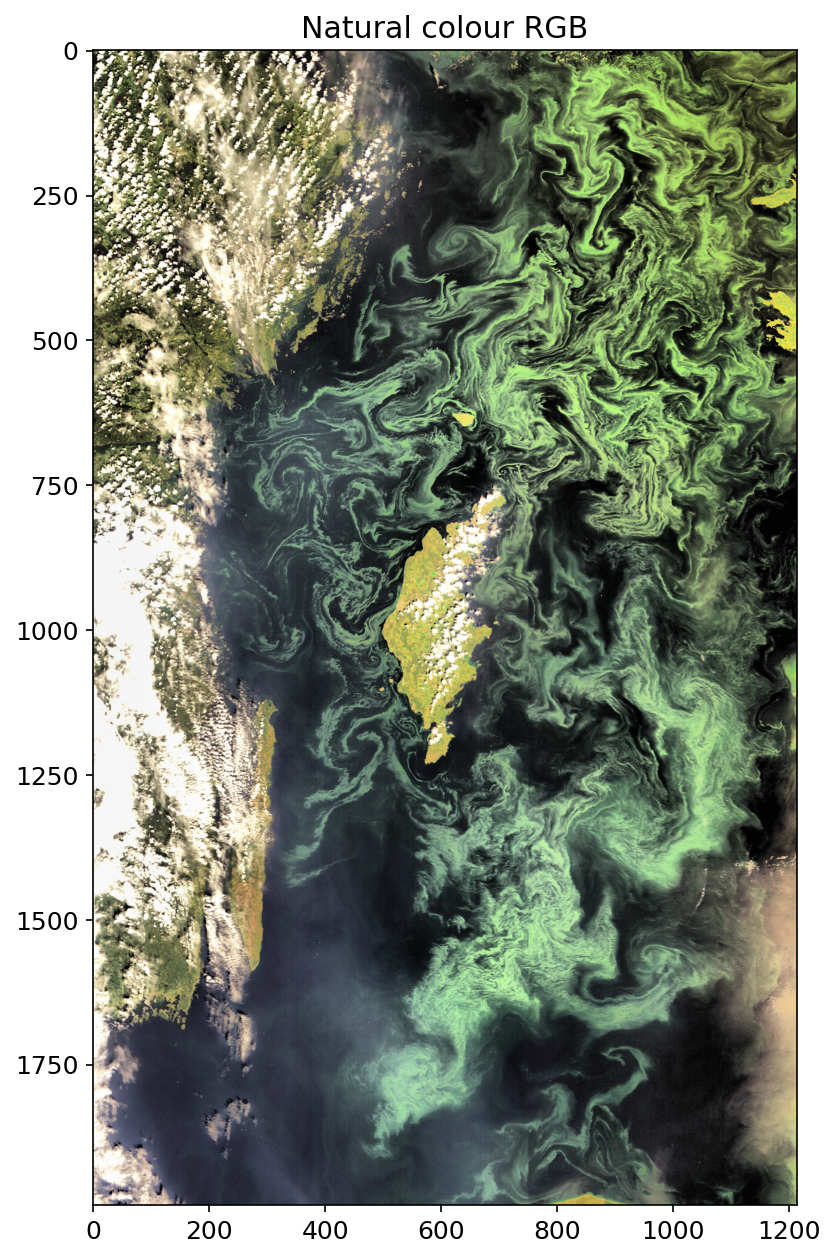

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=150)
ax.imshow(rgb_final)
ax.title.set_text('Natural colour RGB')
plt.show()

The resulting image summarises the varying colours of both the ocean and land. We can already intuitively identify some features from this image. Varying land cover and clouds are already clear, as well as some unclear atmosphere conditions which could include thin cloud, aerosols, or glint. Shades of blue, green, and brown indicate varying water quality in inland and coastal waters. In the centre of the sea we can see the bright, green swirls associated with a cyanobacteria bloom.

This is not a quantitative image though, and we can use the individual measurements that ocean colour satellite instruments like OLCI make to derive much more precise geophysical information. So for now, let's now close our level-1 measurement file and open the level-2.

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Comparing standard level-2 chlorophyll estimates
[Back to top](#TOCTOP)

</div>

Level-2 products for ocean colour contain the atmospherically corrected reflectance measurements of the ocean surface at various wavelengths (i.e. the 'colour'). From these estimates of geophysical parameters such as the chlorophyll-a concentration can be derived. Numerous approaches have been tested for this in accurate ways across different water types. There are variations of the classic empirical approach which empirically relates the ratio of blue:green light reflected to the chlorophyll-a concentrations. There are also more complex approaches using modern techniques such as neural networks/AI/machine learning to derive chlorophyll-a and other parameters. 

In the standard OLCI product, there is a chlorophyll-a concentration provided using an example of each of these methods - the OC4ME (empirical), and CHL_NN (using a network trained on a range of in situ measurements). Typically the former is suitable for open ocean waters where phytoplankton are the dominant source of variability, and the other where there are more different sources of variability such as river run off, resuspension of sediments etc. Let's take a look and see how these algorithms perform over our cyanobacteria bloom!

First, lets open our level-2 files as an xarray Dataset, and also identify the auxillary flag related information we need.

In [18]:
# select level-2 files
l2_files = glob.glob(os.path.join(download_dir, '*WFR*', "*.nc"))
ds_l2 = xr.open_mfdataset(l2_files)

# get flag file
for l2_file in l2_files:
    if "wqsf" in l2_file:
        flag_file = l2_file

Next, we will create some masks to appropriate flag our chlorophyll-a estimates. We'll use the flags that <a href="https://user.eumetsat.int/s3/eup-strapi-media/Recommendations_for_Sentinel_3_OLCI_Ocean_Colour_product_validations_in_comparison_with_in_situ_measurements_Matchup_Protocols_V8_B_e6c62ce677.pdf" target="_blank">EUMETSAT recommend</a> to create our masks, beginning with a mask for the OC4ME algorithm;

In [19]:
# creating masks for CHL_OC4ME: BAC recommended flags
OC4ME_mask = eumartools.flag_mask(flag_file, 'WQSF', ['LAND', 'CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_MARGIN', 
                                                    'INVALID', 'SATURATED', 'SUSPECT',
                                                    'HISOLZEN', 'HIGHGLINT', 'SNOW_ICE', 'AC_FAIL',
                                                    'WHITECAPS', 'ADJAC', 'RWNEG_O2', 'RWNEG_O3',
                                                    'RWNEG_O4', 'RWNEG_O5', 'RWNEG_O6', 'RWNEG_O7', 'RWNEG_O8',
                                                    'OC4ME_FAIL'])
OC4ME_mask = OC4ME_mask.astype(float)
OC4ME_mask[OC4ME_mask == 1.0] = np.nan
OC4ME_mask[np.isfinite(OC4ME_mask)] = 1.0

..and next for the neural network algorithm...

In [20]:
# creating masks for CHL_NN: NN recommended flags
NN_mask = eumartools.flag_mask(flag_file, 'WQSF', ['LAND', 'CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_MARGIN', 
                                                    'INVALID', 'SATURATED', 'SUSPECT',
                                                    'HISOLZEN', 'HIGHGLINT', 'SNOW_ICE', 'OCNN_FAIL'])
NN_mask = NN_mask.astype(float)
NN_mask[NN_mask == 1.0] = np.nan
NN_mask[np.isfinite(NN_mask)] = 1.0

Lets now apply the masks to our chlorophyll products, ensuring that only high quality data remains.

In [21]:
CHL_OC4ME = ds_l2["CHL_OC4ME"] * OC4ME_mask
CHL_NN = ds_l2["CHL_NN"] * NN_mask

KeyError: "No variable named 'longitude'. Variables on the dataset include ['CHL_NN', 'CHL_NN_err', 'CHL_OC4ME', 'CHL_OC4ME_err', 'Oa06_reflectance', ..., 'Oa12_reflectance', 'Oa12_reflectance_err', 'Oa18_reflectance', 'Oa18_reflectance_err', 'WQSF']"

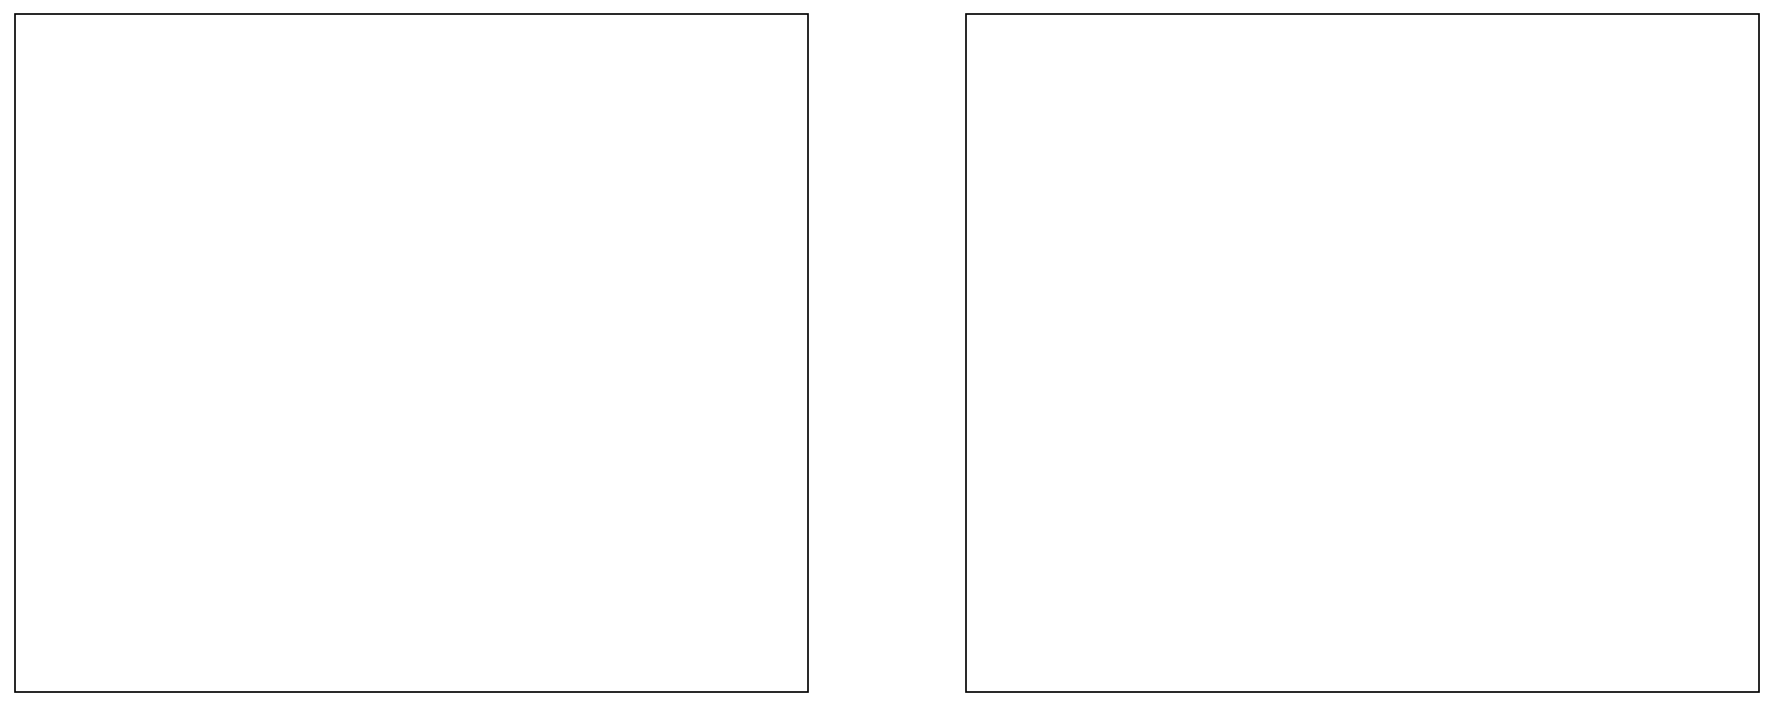

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10), dpi=150, subplot_kw={"projection": ccrs.Mercator()})

for m, chl, label in zip(axs, [CHL_OC4ME, CHL_NN], ['CHL: OC4ME', 'CHL: NN']):
    
    p1 = m.pcolormesh(ds_l2["longitude"][min(ey_l2):max(ey_l2), min(ex_l2):max(ex_l2)],
                      ds_l2["latitude"][min(ey_l2):max(ey_l2), min(ex_l2):max(ex_l2)],
                      chl[min(ey_l2):max(ey_l2), min(ex_l2):max(ex_l2)],
                      vmin=-1, vmax=2, transform=ccrs.PlateCarree())
    embellish_plot(m)
    m.annotate(label, (0.05, 0.05), xycoords="axes fraction", zorder=1000, color='w')

plt.tight_layout()

cbar = fig.colorbar(p1, ax=axs[:], location='bottom', pad=0.1, aspect=50)
ticks = [-1, 0, 1, 2]
cbar.set_ticks(ticks)
cbar.set_ticklabels([10**tick for tick in ticks])
cbar.set_label('Chlorophyll concentration [mg.m$^{-3}$]')
plt.show()

We can see that there are significant differences between the two algorithms. The OC4ME shows significantly higher chlorophyll-a estimates than the CHL_NN, particularly over the area we recognised in the earlier true colour image as a cyanobacteria blooms. The results are complicated by other things we observed in the true colour image such a thin cloud, aerosols, and sediments in the coastal regions. For the latter the CHL_NN method is trained. Understanding the methods behind these algorithms, we can begin to understand that they may not be the most suitable approaches. Whilst dense blooms of phytoplankton, with high chlorophyll-a, are typically quite absorbant, cyanobacteria blooms are uncharacteristically bright, particularly in the green, differing from the paradigm which the OC4ME represents. For the CHL_NN, the method is limited by the training set, which was focused on a broad range of water types, and not explicitly cyanobacteria. We have additional complications to consider that could affect algorithm performance, such as the suitability of the atmospheric correction, which is likely to be challenging, given the view of the atmosphere and cloud effects in the true colour, top-of-atmosphere imagery.

In [ ]:
ds_l2.close()

<div class="alert alert-info" role="alert">

## <a id='section5'></a>5. The Maximum Peak Height (MPH) chlorophyll algorithm
[Back to top](#TOCTOP)

</div>

As indicated above, cyanobacteria can be a challenge for traditional Chlorophyll-a retrieval approaches thanks to the more unusual optical properties imparted by the way their cellular structure and way they typically accumulate on the surface. 

Other methods have been derived to take advantage of these features such as the Maximum Peak Height algorithm of Matthews et al., 2012 [[ref]]. This algorithm exploits the peaks observed in reflectance of high biomass blooms in the red region of the spectrum, particularly those associated with cyanobacteria (see the examples in the [figure 2](#figure2) below, panels A, B, C).

<figure><center>
  <img src="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/raw/main/img/Matthews_et_al_2020.png" width='50%'/>
  <figcaption><a id='figure2'>Figure 2: Example reflectance, optical and geophysical properties of cyanobacteria and other phytoplankton blooms (<a href="https://www.sciencedirect.com/science/article/abs/pii/S0034425712002350" target="_blank">Matthews et al. (2012)</a>, used under license for training from Elsevier, number 5793650895148) </figcaption>
</center></figure>

This algorithm can be applied to level-1 OLCI data using the processor in the SNAP software that also applies a Rayleigh correction ([figure3](#figure3)). Use of level-1 and partial correction removes some of the uncertainties introduced by full atmospheric correction in complex, near coastal water. The Rayleigh correction normalises for some of the gaseous effects of the atmosphere, and removes the water vapour effect, whilst avoiding the correction of the more complex aerosol component, which can introduce more error. 

<figure><center>
  <img src="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/raw/main/img/SNAP_MPH.png" width='100%'/>
  <figcaption><a id='figure3'>Figure 3: Applying the MPH algorithm to level-1B OLCI data using the SNAP GUI (credit: EUMETAT)</figcaption>
</center></figure>

We have pre-run the level-1 image used above, through the MPH processor in SNAP. Lets open it and visualise the output.

In [ ]:
MPH_file = "S3B_OL_1_EFR____20220703T093100_20220703T093400_20220704T142637_0179_067_364_1980_MAR_O_NT_002_MPH.nc"
ds_mph = xr.open_dataset(MPH_file)

First, as before, we'll create a flag mask. Here we'll use some of the standard flags, as well as some from the MPH processor...

In [ ]:
# creating masks for MPH
MPH_mask = eumartools.flag_mask(flag_file, 'WQSF', ['LAND', 'CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_MARGIN', 
                                                    'INVALID', 'SATURATED', 'SUSPECT',
                                                    'HISOLZEN', 'HIGHGLINT', 'SNOW_ICE'])
MPH_mask = MPH_mask.astype(float)
MPH_mask[MPH_mask == 1.0] = np.nan
MPH_mask[np.isfinite(MPH_mask)] = 1.0

...and apply the mask to our chlorophyll estimate...

In [ ]:
CHL_MPH = np.log10(ds_mph["chl"]) * MPH_mask

Now, let's add the chlorophyll-a concentration estimated from the MPH to our previous plot...

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10), dpi=150, subplot_kw={"projection": ccrs.Mercator()})

for m, chl, label in zip(axs, [CHL_OC4ME, CHL_NN, CHL_MPH], ['CHL: OC4ME', 'CHL: NN', 'CHL: MPH']):
    
    p1 = m.pcolormesh(ds_mph["longitude"][min(ey_l2):max(ey_l2), min(ex_l2):max(ex_l2)],
                      ds_mph["latitude"][min(ey_l2):max(ey_l2), min(ex_l2):max(ex_l2)],
                      chl[min(ey_l2):max(ey_l2), min(ex_l2):max(ex_l2)],
                      vmin=-1, vmax=2, transform=ccrs.PlateCarree())
    embellish_plot(m)
    m.annotate(label, (0.05, 0.05), xycoords="axes fraction", zorder=1000, color='w')

plt.tight_layout()

cbar = fig.colorbar(p1, ax=axs[:], location='bottom', pad=0.1, aspect=50)
ticks = [-1, 0, 1, 2]
cbar.set_ticks(ticks)
cbar.set_ticklabels([10**tick for tick in ticks])
cbar.set_label('Chlorophyll concentration [mg.m$^{-3}$]')
plt.show()

ds_mph.close()

Here we can see that the MPH shows much greater differentiation in terms of the chlorophyll-a concentrations associated with what we visually identified as the cyanobacteria bloom, and the surrounding ocean; as well as more variability in the concentrations over the blooms itself.

We can use the flags from the MPH chlorophyll algorithm to see where we have cyanobacteria dominated waters, and where we have floating vegetation or cyanobacteria.

In [ ]:
# creating masks for MPH
MPH_cyano = eumartools.flag_mask(MPH_file, 'mph_chl_flags', ['mph_cyano'])
MPH_floating = eumartools.flag_mask(MPH_file, 'mph_chl_flags', ['mph_floating'])

Lets check our flag maps....

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10), dpi=150, subplot_kw={"projection": ccrs.Mercator()})

for m, mask, label in zip(axs, [MPH_cyano, MPH_floating], ['Cyanobacteria dominated waters (yellow)', 'Floating vegetation (yellow)']):
    
    p1 = m.pcolormesh(ds_mph["longitude"][min(ey_l2):max(ey_l2), min(ex_l2):max(ex_l2)],
                      ds_mph["latitude"][min(ey_l2):max(ey_l2), min(ex_l2):max(ex_l2)],
                      mask[min(ey_l2):max(ey_l2), min(ex_l2):max(ex_l2)],
                      vmin=-1, vmax=1, transform=ccrs.PlateCarree())
    embellish_plot(m)
    m.annotate(label, (0.05, 0.05), xycoords="axes fraction", zorder=1000, color='k')

plt.tight_layout()
plt.show()

The flags from the MPH align with the brightest parts of the bloom seen in the original level-1 true colour image. However they don't map 1:1 with the area we might visually identify as expected to be associated with the bloom. This may be because the bloom is mixed with other species, is at a relatively low concentration, or perhaps it is subsurface, which could also affect the optical properties and the relevance of the approach used in the algorithm to flag the cyanobacteria. You can read more about this flagging procedure in <a href="https://www.cyanolakes.com/publications/Matthews&Odermatt_2015.pdf" target="_blank">Matthews and Odermatt (2015)</a>.

In the next section, we will contextualise the estimates associated with this specific event with another product available over a long time series. Lets extract area averages over our level-3 area of interest, and close our MPH data set.

In [ ]:
CHL_averages = [np.nanmean(CHL_OC4ME[min(ey_l4):max(ey_l4), min(ex_l4):max(ex_l4)]),
                np.nanmean(CHL_NN[min(ey_l4):max(ey_l4), min(ex_l4):max(ex_l4)]),
                np.nanmean(CHL_MPH[min(ey_l4):max(ey_l4), min(ex_l4):max(ex_l4)])]

Lets clear up a bit....

In [ ]:
%reset_selective -f mask*
%reset_selective -f rgb*
%reset_selective -f MPH*

<div class="alert alert-info" role="alert">

## <a id='section6'></a>6. Exploring level-3 ocean colour products from the Copernicus Marine Service
[Back to top](#TOCTOP)

</div>

To generate a long time series of ocean colour measurements requires combining data from multiple satellite missions, and applying algorithms that are suitable for this, taking in to account the different spectral configurations etc of the missions. For example, above we apply the MPH which only uses wavebands available on Sentinel-3 OLCI, and the historical MERIS mission. This limits it's suitability for application to long time series. Further it is designed for focusing on blooms, and doesn't account for other forms of variability which are present in the Baltic sea.

As an optimal approach, we will access data from the Copernicus marine service where a regionally trained neural network using multiple algorithmic approaches is applied to multiyear records of ocean colour [[3]](#ref3). We will access data from the Copernicus Marine Service using the Copernicus Marine API. This loads data directly into memory, without the need to write anythin to a file.

<div class="alert alert-block alert-success">

### Accessing Copernicus Marine Service products

To retrieve the data, we need will use the <a href="https://help.marine.copernicus.eu/en/articles/7949409-copernicus-marine-toolbox-introduction" target="_blank">Copernicus Marine API</a>. This allows us to remotely subset the data and read it directly into memory, for immediate use. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install the toolkit using;

`conda install -c conda-forge copernicusmarine`

To download data using the Copernicus Marine API, you need to provide credentials. To obtain these, you should register at the <a href="https://data.marine.copernicus.eu/register" target="_blank">Copernicus Marine Service</a> for an account and take note of you `username` and `password`. If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: For more information on authentication options please see this <a href="https://help.marine.copernicus.eu/en/articles/8185007-copernicus-marine-toolbox-credentials-configuration" target="_blank">web article</a>.*

</div>

In [ ]:
# Default location expected by the copernicusmarine package
copernicus_marine_credentials_file = Path(Path.home() / '.copernicusmarine' / '.copernicusmarine-credentials')

# Create it only if it does not already exists
if not copernicus_marine_credentials_file.is_file():
    copernicusmarine.login()

Now we are authenticated, let's connect to our data set using the `open_dataset` method in the `copernicusmarine` toolkit.

In [ ]:
ds_L3 = copernicusmarine.open_dataset(
               dataset_id=CMEMS_product,
               variables=CMEMS_variables,
               minimum_longitude=ROI_L3[0],
               maximum_longitude=ROI_L3[1],
               minimum_latitude=ROI_L3[2],
               maximum_latitude=ROI_L3[3],
               start_datetime=start_oper_L3.strftime("%Y-%m-%dT00:00:00.000Z"),
               end_datetime=end_oper_L3.strftime("%Y-%m-%dT23:59:59.000Z"))

Lets look at our DataSet...

In [ ]:
ds_L3

You can see that, unlike level-2 data, level-3 data is regularly gridded and is essentially a "cube" of data. You can see this in the `CHL` variable, which has dimensions of *time, latitude, longitude*.

There are a variety of nice plotting tools to view gridded data, and we are going to use one called `xcube` that allows us to explore temporally and spatially. Below, we will set up our "viewer", configuring a *style* that will determine how we see the data in the viewer.

In [ ]:
viewer = Viewer(
    server_config={
        "Styles": [
            {
                "Identifier": "CHL",
                "ColorMappings": {
                    "CHL": {"ValueRange": [0, 7], "ColorBar": "viridis"}
                },
            }        
        ]
    }
)

Lets now add our Dataset to the viewer, associating it with our defined *style*, and show the viewer. The viewer will open the latest "time slice" of the data set, but you can iterate it in time using the arrow buttons and click on any "populated" pixel to see a time series. You can also animate the whole time series using the "play" button.

Explore the tool to see how the gridded CHL field changes in and around our bloom event.

In [ ]:
viewer.add_dataset(ds_L3, title="CHL", style="CHL");
viewer.show()

<div class="alert alert-info" role="alert">

## <a id='section7'></a>7. Downloading and analysing level-3 ocean colour products
[Back to top](#TOCTOP)

</div>

For this final part of our analysis, we will download some data from the Copernicus Marine Service. Lets start by defining a file name (`output_filename`) our downloaded data, and cleat any existing file of the same name.

In [ ]:
output_filename="CMEMS_L4_BGC_CHL.nc"
if download_l3_data:
    if os.path.exists(output_filename):
        os.remove(output_filename)

To download data, rather than use the `open_dataset` option we used in the previous section, we use the `subset` method, which will write the data to our defeined output file.

In [ ]:
if download_l3_data:
    copernicusmarine.subset(
                   dataset_id=CMEMS_product,
                   variables=CMEMS_variables,
                   minimum_longitude=ROI_L3[0],
                   maximum_longitude=ROI_L3[1],
                   minimum_latitude=ROI_L3[2],
                   maximum_latitude=ROI_L3[3],
                   start_datetime=start_clim_L3.strftime("%Y-%m-%dT00:00:00.000Z"),
                   end_datetime=end_clim_L3.strftime("%Y-%m-%dT23:59:59.000Z"),
                   force_download=True,
                   output_filename=output_filename)

Next, lets process our downloaded data. We beginning by opening the relevant file...

In [ ]:
ds_L3 = xr.open_mfdataset(output_filename)

We don't want to take an area mean when the data is very sparse, so we will discard any time slice where we have less than "`n_cut`" points (n_cut by default is set to 10000)

In [ ]:
n_cut = 10000
ds_L3 = ds_L3.where(ds_L3["CHL"].count(dim=["longitude", "latitude"]) > n_cut)

In [ ]:
CHL = np.log10(ds_L3["CHL"].mean(dim=['latitude', 'longitude']).compute())
time = ds_L3["time"].compute()

Finally, lets calculate a mean seasonal climatology so that we can compare our year of interest with the historical average.

In [ ]:
CLIM = CHL.groupby("time.dayofyear").mean()
CLIM = CLIM[ds_L3.time.dt.dayofyear - 1]
ds_L3.close()

We are ready to make our final plot...

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5), dpi=150)
plt.plot(time, CHL)
plt.plot(time, CLIM, linestyle="--")

plots = []
for CHL_average, col in zip(CHL_averages, ["r", "#E67E22", "b"]):
    p1 = plt.scatter(datetime.datetime(2022, 7, 3), CHL_average, s=100, alpha=0.5, c=col,edgecolor="k", zorder=100)
    plots.append(p1)

plt.legend(plots, ["CHL: OC4ME", "CHL: NN", "CHL: MPH"], frameon=False)
plt.xlabel("Date")
plt.ylabel("Chlorophyll concentration [mg.m$^{-3}$]");
plt.xlim([datetime.datetime(2022, 1, 1), datetime.datetime(2022, 12, 31)])
plt.xticks(rotation=45)
ticks = [0, np.log10(3), 1, np.log10(30)]
plt.ylim([min(ticks), max(ticks)])
plt.yticks(ticks, [round(10**i) for i in ticks])

plt.show()

From the time series of Chlorophyll-a concentration we can see a general seasonal cycle of elevated chlorophyll-a in the spring, followed by a decrease, and then a further elevation over the summer and early autumn. This can be observed in the data for 2022 (blue line), and the 10 year daily average climatology (dashed orange line). We can see that the two standard chlorophyll-a estimates are signficantly higher than the MPH, which agrees very closely with the estimate from the level-3 product. 

We can also observe the high level of variability around the average, seeing the spikes where the blue line deviates. However, how do we know if these are cyanobacteria blooms or not? Accurate chlorophyll-a estimation for cyanobacteria blooms is challenging, with a lack of insitu data, the complex optics of floating/submerged blooms, and further complications from the optical complexity of coastal ocean waters and atmospheres.

In the publication by Brando et al. (2021) [[3]](#ref3) which underlies the Copernicus Marine Service data used above, a threshold technique was used to identify surface and subsurface blooms in both spring and summer, utilising the available remote sensing reflectance at 555nm and 670 nm in the underlying merged satellite data. This allowed for a more robust estimation of bloom patterns as a general indicator of eutrophication in the region.



<div class="alert alert-info" role="alert">

## <a id='section8'></a>8. Conclusions
[Back to top](#TOCTOP)

</div>

In this notebook we have seen that satellite data is capable of providing a detailed view of cyanobacteria bloom events. Modern sensors such as the OLCI sensors aboard the Sentinel-3 satellites can be exploted, thanks to their unique spectral bands, to develop specific algorithms for detection of blooms. Longer time series of ocean colour data are being developed to support the assessment of the role of blooms in eutrophication trends in regions such as the Baltic sea. As the time series of OLCI data lengthens, and new opportunities from hyperspectral missions are realised, further opportunities will arise to expand this work.



### Suggested next steps

To further develop your skills and knowledge, and expand the application of this notebook you could try:
* Applying the MPH algorithm in SNAP to a time series of OLCI images
* Accessing the regional Baltic reflectance products from the Copernicus marine service, applying the thresholds to the values at 555 nm and 670 nm to identify blooms.


<hr>
<a href="../../../Index.ipynb" target="_blank"><< Index</a>
<hr>

<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>